# Portfolio Optimization

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Collection](#Data-Collection)
3. [Return & Risk Calculation](#Return--Risk-Calculation)
<br> - This topic also included Linear Optimization
4. [Monte Carlo Simulation](#Monte-Carlo-Simulation)
5. [Visualization](#Visualization)
6. [Results](#Results)
7. [Conclusion](#Conclusion)

## Introduction

    This project explores how numerical methods can be applied to portfolio optimization. The main goal is to understand how mathematical techniques can help allocate assets more efficiently and evaluate investment risk.

## Data Collection

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [111]:
amd = pd.read_csv('../data/amd_data.csv')
amzn = pd.read_csv('../data/amzn_data.csv')
cvx = pd.read_csv('../data/cvx_data.csv')
nvda = pd.read_csv('../data/nvda_data.csv')
tsm = pd.read_csv('../data/tsm_data.csv')

In [112]:
amd

,Date,Close,Open,High,Low,Volume,momentum_rsi,momentum_stoch,momentum_roc,momentum_wr,trend_macd,trend_macd_signal,trend_ema_fast,trend_ema_slow,volatility_bbh,volatility_bbl,volatility_atr
0,2015-02-20,3.060000,3.030000,3.130000,3.020000,10666700,60.597387,56.944440,10.869564,-43.055560,0.127181,0.128352,3.017328,2.890147,3.377431,2.414569,0.132561
1,2015-02-23,3.060000,3.050000,3.100000,3.030000,6323500,60.597387,55.072460,7.368423,-44.927540,0.121164,0.126915,3.023893,2.902729,3.366558,2.486442,0.126305
2,2015-02-24,3.110000,3.060000,3.120000,3.020000,10916300,62.993571,57.377043,-6.042298,-42.622957,0.119058,0.125343,3.037140,2.918082,3.373224,2.529776,0.123674
3,2015-02-25,3.100000,3.080000,3.140000,3.060000,6151300,62.179140,46.000004,2.310229,-53.999996,0.115253,0.123325,3.046811,2.931558,3.381391,2.561609,0.119307
4,2015-02-26,3.080000,3.100000,3.130000,3.060000,8680900,60.494568,53.571383,1.315788,-46.428617,0.109363,0.120533,3.051917,2.942554,3.374810,2.613190,0.114376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,2025-11-07,233.539993,230.940002,235.869995,224.639999,52162600,51.272053,20.970774,1.437692,-79.029226,13.275143,17.364242,245.446128,232.170986,270.815879,215.956118,12.556381
2697,2025-11-10,243.979996,242.139999,248.899994,240.500000,43361600,56.150155,45.570222,3.825690,-54.429778,12.174842,16.326362,245.220570,233.045727,269.247469,220.280528,12.836743
2698,2025-11-11,237.520004,241.660004,248.460007,234.639999,61336800,52.638648,30.348748,-6.088879,-69.651252,10.658712,15.192832,244.035867,233.377155,267.272901,224.198096,12.935070
2699,2025-11-12,258.890015,253.130005,263.510010,250.000000,108942000,61.267867,80.702228,-0.300381,-19.297772,11.054124,14.365090,246.321121,235.266997,268.753819,224.746180,14.240563


In [113]:
amzn

,Date,Close,Open,High,Low,Volume,momentum_rsi,momentum_stoch,momentum_roc,momentum_wr,trend_macd,trend_macd_signal,trend_ema_fast,trend_ema_slow,volatility_bbh,volatility_bbl,volatility_atr
0,2015-02-20,19.183001,18.931000,19.184999,18.792000,65160000,76.401904,99.881336,5.531568,-0.118664,0.920036,0.944723,18.514994,17.594958,20.647432,14.998168,0.436719
1,2015-02-23,19.007000,19.172001,19.226999,18.900000,43540000,72.301538,83.276352,4.219332,-16.723648,0.891134,0.934005,18.590687,17.699553,20.670487,15.313863,0.425747
2,2015-02-24,18.929501,18.932501,19.024000,18.808001,38416000,70.507134,77.385095,1.257057,-22.614905,0.852152,0.917634,18.642812,17.790661,20.608083,15.720917,0.404772
3,2015-02-25,19.268499,18.863501,19.392500,18.827000,63490000,73.594268,88.701543,2.963015,-11.298457,0.838942,0.901896,18.739072,17.900130,20.473382,16.248718,0.420845
4,2015-02-26,19.240000,19.203501,19.468500,19.164000,53742000,72.903374,79.386517,3.842832,-20.613483,0.816758,0.884868,18.816138,17.999380,20.128118,16.998431,0.409211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,2025-11-10,248.399994,248.339996,251.750000,245.589996,36476500,63.404441,75.760428,12.352435,-24.239572,6.810453,4.550059,239.888475,233.078022,257.641358,202.778642,7.732245
2698,2025-11-11,249.100006,248.410004,249.750000,247.229996,23564100,63.839536,76.496792,11.101199,-23.503208,7.040798,5.048207,241.305634,234.264835,259.683387,204.007613,7.211021
2699,2025-11-12,244.199997,250.240005,250.369995,243.750000,31190100,58.588505,60.762931,7.591310,-39.237069,6.750147,5.388595,241.750920,235.000773,260.558854,205.995145,7.151918
2700,2025-11-13,237.580002,243.050003,243.750000,236.500000,41401700,52.326388,41.366804,3.633589,-58.633196,5.917413,5.494358,241.109241,235.191827,260.353946,208.511053,7.206726


In [114]:
cvx

,Date,Close,Open,High,Low,Volume,momentum_rsi,momentum_stoch,momentum_roc,momentum_wr,trend_macd,trend_macd_signal,trend_ema_fast,trend_ema_slow,volatility_bbh,volatility_bbl,volatility_atr
0,2015-02-20,69.156700,69.048445,69.328639,68.456219,7610600,50.513619,60.499161,0.125039,-39.500839,0.479131,0.391773,69.537998,69.058867,72.460908,64.798674,1.467487
1,2015-02-23,68.685455,68.640879,69.093008,68.360685,6724000,48.319614,23.004115,0.525757,-76.995885,0.375631,0.388545,69.406838,69.031207,72.483029,64.907068,1.400340
2,2015-02-24,68.749130,68.704554,68.927434,68.354311,5708400,48.644197,24.522638,-0.264715,-75.477362,0.295340,0.369904,69.305652,69.010312,72.487499,64.911467,1.317618
3,2015-02-25,69.143944,68.851016,69.271302,68.621766,4806500,50.711267,26.165652,0.033511,-73.834348,0.260563,0.348036,69.280774,69.020211,72.530547,64.955868,1.250810
4,2015-02-26,68.176033,68.704580,68.723683,67.883105,5903100,45.840036,7.266976,-2.099242,-92.733024,0.153135,0.309055,69.110814,68.957679,72.359940,65.404058,1.251813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,2025-11-11,156.240005,156.750000,157.990005,155.899994,6361400,54.748215,58.179407,0.437135,-41.820593,0.079796,-0.124615,154.704033,154.624237,157.485001,151.370001,2.733517
2699,2025-11-12,153.320007,155.580002,155.789993,152.080002,11670900,46.714264,17.464889,-1.262230,-82.535111,-0.036521,-0.106997,154.491106,154.527627,157.404303,151.571700,2.876165
2700,2025-11-13,155.580002,154.000000,156.199997,153.929993,7998700,52.521455,49.295838,0.940762,-50.704162,0.053048,-0.074988,154.658628,154.605581,157.336701,152.026301,2.876548
2701,2025-11-14,157.619995,156.229996,157.949997,154.809998,8482500,57.069522,78.028175,1.624751,-21.971825,0.285353,-0.002920,155.114223,154.828871,157.747156,152.069846,2.902893


In [115]:
nvda

,Date,Close,Open,High,Low,Volume,momentum_rsi,momentum_stoch,momentum_roc,momentum_wr,trend_macd,trend_macd_signal,trend_ema_fast,trend_ema_slow,volatility_bbh,volatility_bbl,volatility_atr
0,2015-02-20,0.536069,0.531750,0.536309,0.527911,157752000,70.186523,95.505664,11.089012,-4.494336,0.014831,0.010165,0.517188,0.502357,0.550348,0.447403,0.012277
1,2015-02-23,0.531750,0.535829,0.535829,0.529110,125008000,66.795199,88.027987,9.920607,-11.972013,0.014894,0.011111,0.519428,0.504534,0.554026,0.447205,0.011745
2,2015-02-24,0.537411,0.533798,0.537411,0.528980,149356000,68.915024,95.852606,9.301611,-4.147394,0.015225,0.011934,0.522195,0.506970,0.558411,0.447082,0.011414
3,2015-02-25,0.533316,0.535243,0.537652,0.530907,123820000,65.649957,88.308438,8.947292,-11.691562,0.014985,0.012544,0.523906,0.508921,0.561047,0.450673,0.010947
4,2015-02-26,0.534761,0.533798,0.537893,0.530425,152864000,66.257620,90.871554,9.349762,-9.128446,0.014741,0.012983,0.525576,0.510835,0.562349,0.456510,0.010599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,2025-11-10,199.050003,195.110001,199.940002,193.789993,198897100,57.529512,62.912796,9.272068,-37.087204,3.554173,4.024608,194.578548,191.024375,209.967926,171.871076,8.046015
2698,2025-11-11,193.160004,195.160004,195.419998,191.300003,176483300,51.953325,42.818511,3.704504,-57.181489,3.177741,3.855235,194.360310,191.182570,209.971822,173.180180,8.016414
2699,2025-11-12,193.800003,195.720001,195.889999,191.130005,154935300,52.492166,44.741586,1.206328,-55.258414,2.897656,3.663719,194.274109,191.376454,209.877063,174.671940,7.690772
2700,2025-11-13,186.860001,191.050003,191.440002,183.850006,207423100,46.413521,23.888213,-7.048698,-76.111787,2.091575,3.349290,193.133477,191.041902,209.660516,175.393486,7.916694


In [116]:
tsm

,Date,Close,Open,High,Low,Volume,momentum_rsi,momentum_stoch,momentum_roc,momentum_wr,trend_macd,trend_macd_signal,trend_ema_fast,trend_ema_slow,volatility_bbh,volatility_bbl,volatility_atr
0,2015-02-20,18.293482,18.488094,18.495577,18.188690,7268000,60.509894,78.947596,5.572353,-21.052404,0.390725,0.334563,18.092238,17.701512,18.875660,16.848278,0.370846
1,2015-02-23,18.128813,18.271029,18.286000,18.061447,7827400,57.278136,70.040779,2.714166,-29.959221,0.364700,0.340590,18.097865,17.733164,18.890244,16.850909,0.356965
2,2015-02-24,18.742586,18.248571,18.772526,18.226117,15932700,64.820148,98.455633,5.832594,-1.544367,0.389116,0.350295,18.197053,17.807936,18.989035,16.817987,0.385640
3,2015-02-25,18.742586,18.750070,18.952167,18.705160,10388400,64.820148,90.106027,8.398265,-9.893973,0.403811,0.360999,18.280981,17.877170,19.078517,16.792128,0.371777
4,2015-02-26,18.473122,18.562942,18.705158,18.450666,7588500,59.474157,77.385035,8.866301,-22.614965,0.389227,0.366644,18.310541,17.921314,19.130214,16.796568,0.363791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,2025-11-10,295.269989,294.359985,297.130005,291.750000,10869200,52.639578,54.986328,1.561579,-45.013672,2.802901,5.084310,294.958544,292.155643,307.492607,285.950389,9.292819
2698,2025-11-11,291.170013,292.059998,294.920013,288.910004,9666300,49.570562,42.558390,-1.284913,-57.441610,2.293060,4.526060,294.375693,292.082633,307.520703,285.445295,8.999536
2699,2025-11-12,290.619995,293.700012,294.869995,289.579987,9715900,49.156516,40.891162,-2.558258,-59.108838,1.823604,3.985569,293.797893,291.974290,306.417292,285.139706,8.628583
2700,2025-11-13,282.200012,289.170013,289.500000,280.000000,13827600,43.206811,15.368320,-6.410635,-84.631680,0.763335,3.341122,292.013604,291.250269,306.881829,282.911170,8.827724


In [117]:
stocks = [amd, amzn, cvx, nvda, tsm]
for i in stocks:
    i['Date'] = pd.to_datetime(i['Date'])
    i = i.set_index('Date')

In [118]:
# we only want the closed column
stocks = {
    "AMD": amd,
    "AMZN": amzn,
    "CVX": cvx,
    "NVDA": nvda,
    "TSM": tsm
}
close_dfs = {}

for name, df in stocks.items():
    close_dfs[name] = df[['Close']].rename(columns={'Close': f'{name}_Close'})

In [119]:
df = pd.concat(close_dfs.values(), axis=1, join='inner')
df

,AMD_Close,AMZN_Close,CVX_Close,NVDA_Close,TSM_Close
0,3.060000,19.183001,69.156700,0.536069,18.293482
1,3.060000,19.007000,68.685455,0.531750,18.128813
2,3.110000,18.929501,68.749130,0.537411,18.742586
3,3.100000,19.268499,69.143944,0.533316,18.742586
4,3.080000,19.240000,68.176033,0.534761,18.473122
...,...,...,...,...,...
2696,233.539993,244.410004,155.020004,188.149994,286.500000
2697,243.979996,248.399994,155.649994,199.050003,295.269989
2698,237.520004,249.100006,156.240005,193.160004,291.170013
2699,258.890015,244.199997,153.320007,193.800003,290.619995


In [120]:
df.columns = df.columns.str.replace('_Close', '', regex=False)
df

,AMD,AMZN,CVX,NVDA,TSM
0,3.060000,19.183001,69.156700,0.536069,18.293482
1,3.060000,19.007000,68.685455,0.531750,18.128813
2,3.110000,18.929501,68.749130,0.537411,18.742586
3,3.100000,19.268499,69.143944,0.533316,18.742586
4,3.080000,19.240000,68.176033,0.534761,18.473122
...,...,...,...,...,...
2696,233.539993,244.410004,155.020004,188.149994,286.500000
2697,243.979996,248.399994,155.649994,199.050003,295.269989
2698,237.520004,249.100006,156.240005,193.160004,291.170013
2699,258.890015,244.199997,153.320007,193.800003,290.619995


In [121]:
import os

file_path = "../data/final.csv"

if not os.path.exists(file_path):
    df.to_csv(file_path, index=False)
    print("File saved.")
else:
    print("File already exists. Skipped saving.")

File already exists. Skipped saving.


## Return-Risk Calculation

In [122]:
# daily percentage returns
returns = df.pct_change().dropna()
returns

,AMD,AMZN,CVX,NVDA,TSM
1,0.000000,-0.009175,-0.006814,-0.008058,-0.009002
2,0.016340,-0.004077,0.000927,0.010646,0.033856
3,-0.003215,0.017908,0.005743,-0.007620,0.000000
4,-0.006452,-0.001479,-0.013998,0.002710,-0.014377
5,0.009740,-0.012058,-0.003549,-0.006306,-0.006078
...,...,...,...,...,...
2696,-0.017501,0.005637,0.013600,0.000372,-0.009473
2697,0.044703,0.016325,0.004064,0.057933,0.030611
2698,-0.026478,0.002818,0.003791,-0.029591,-0.013886
2699,0.089971,-0.019671,-0.018689,0.003313,-0.001889


In [123]:
mu = returns.mean() # means returns 
sigma = returns.cov() # covariance
print(mu, sigma)

AMD     0.002299
AMZN    0.001146
CVX     0.000471
NVDA    0.002642
TSM     0.001228
dtype: float64            AMD      AMZN       CVX      NVDA       TSM
AMD   0.001373  0.000320  0.000156  0.000668  0.000370
AMZN  0.000320  0.000428  0.000081  0.000333  0.000191
CVX   0.000156  0.000081  0.000340  0.000143  0.000122
NVDA  0.000668  0.000333  0.000143  0.000953  0.000395
TSM   0.000370  0.000191  0.000122  0.000395  0.000430


In [124]:
r = np.array(mu)
r

array([0.0022987 , 0.00114565, 0.00047141, 0.00264245, 0.00122798])

In [125]:
sigma = np.array(sigma)
sigma

array([[1.37285602e-03, 3.19638939e-04, 1.55765977e-04, 6.68498671e-04,
        3.69816457e-04],
       [3.19638939e-04, 4.28212389e-04, 8.05228250e-05, 3.33223315e-04,
        1.91418546e-04],
       [1.55765977e-04, 8.05228250e-05, 3.39841311e-04, 1.42935370e-04,
        1.22368392e-04],
       [6.68498671e-04, 3.33223315e-04, 1.42935370e-04, 9.53269665e-04,
        3.95248091e-04],
       [3.69816457e-04, 1.91418546e-04, 1.22368392e-04, 3.95248091e-04,
        4.29565822e-04]])

In [126]:
n = len(mu)
init = np.ones(n)/n # sum(weight) = 1
print(n, init)

5 [0.2 0.2 0.2 0.2 0.2]


In [127]:
def cost_func(w, sigma, R, q=0.0):
    """
    w : weights vector
    Sigma : covariance matrix
    R : expected return vector
    q : risk tolerance (higher = more risk-tolerant)
    """
    return w.T @ Sigma @ w - q * (w @ R)

In [141]:
from scipy.optimize import minimize

# sum of weights = 1
constraints = {"type": "eq", "fun": lambda w: np.sum(w) - 1}

# bounds: no short-selling
bounds = [(0, 1) for _ in range(n)]

In [144]:
q = 0.5  # change q to higher value for more risk-tolerant portfolios
result = minimize(cost_func, init, args=(sigma, r, q), bounds=bounds, constraints=constraints)
w_opt = result.x
print("Optimal weights:", w_opt)

Optimal weights: [0.17991279 0.26319214 0.         0.2984745  0.25842057]


In [130]:
mu_p = w_opt @ r # expected portfolio return
sigma_p = np.sqrt(w_opt.T @ sigma @ w_opt)  # portfolio standard deviation

print("expected portfolio return:", mu_p)
print("portfolio risk (std):", sigma_p)

expected portfolio return: 0.001821130033123511
portfolio risk (std): 0.021529739090670668


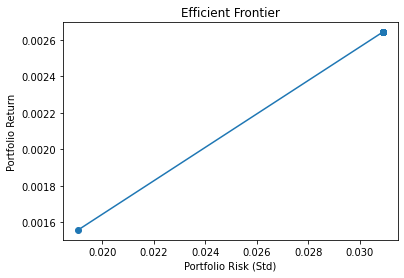

In [131]:
# Efficient Frontier
q_values = np.linspace(0, 1000, 50)
risks, returns = [], []

for q in q_values:
    res = minimize(cost_func, init, args=(sigma, r, q), bounds=bounds, constraints=constraints)
    w = res.x
    returns.append(w @ r)
    risks.append(np.sqrt(w.T @ sigma @ w))

plt.plot(risks, returns, marker='o')
plt.xlabel('Portfolio Risk (Std)')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier')
plt.show()

### Monte Carlo Simulation

In [132]:
simulations = 10000
days = 252  # 1 year
final_portfolio_values = np.zeros(simulations)

for i in range(simulations):
    # simulate daily returns for all stocks
    daily_returns = np.random.multivariate_normal(r, sigma, size=days)
    # compute portfolio daily returns
    port_daily = daily_returns @ w_opt
    # compute total growth factor
    final_portfolio_values[i] = np.prod(1 + port_daily)

In [133]:
VaR95 = np.percentile(final_portfolio_values, 5)  # 5% worst case
mean_final = final_portfolio_values.mean()

## Visualization

### Monte-Carlo 

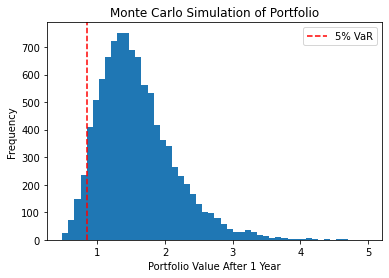

In [134]:
plt.hist(final_portfolio_values, bins=50)
plt.axvline(VaR95, color='r', linestyle='--', label='5% VaR')
plt.xlabel("Portfolio Value After 1 Year")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation of Portfolio")
plt.legend()
plt.show()

### Portfolio Weighted Distribution

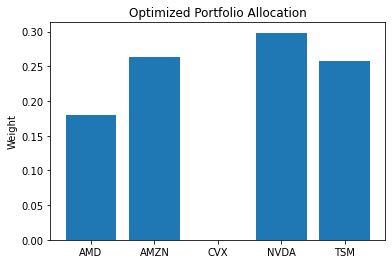

In [135]:
# depending on q value 
plt.bar(df.columns, w_opt)
plt.ylabel("Weight")
plt.title("Optimized Portfolio Allocation")
plt.show()

### CVX and q trade-offs

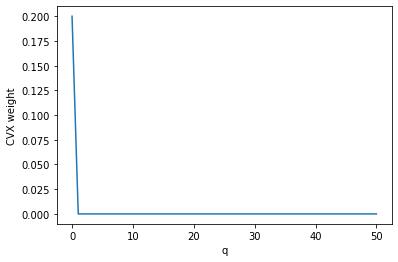

In [149]:
# low variance
q_values = np.linspace(0, 50, 50)
weights_CVX = []

for q in q_values:
    res = minimize(cost_func, init, args=(sigma, r, q), bounds=bounds, constraints=constraints)
    weights_CVX.append(res.x[2])  # CVX is index 2

plt.plot(q_values, weights_CVX)
plt.xlabel("q")
plt.ylabel("CVX weight")
plt.show()

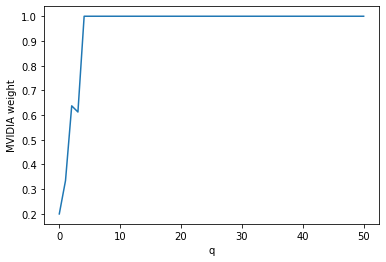

In [150]:
# higher variance
q_values = np.linspace(0, 50, 50)
weights_NVDA = []

for q in q_values:
    res = minimize(cost_func, init, args=(sigma, r, q), bounds=bounds, constraints=constraints)
    weights_NVDA.append(res.x[3]) 

plt.plot(q_values, weights_NVDA)
plt.xlabel("q")
plt.ylabel("MVIDIA weight")
plt.show()

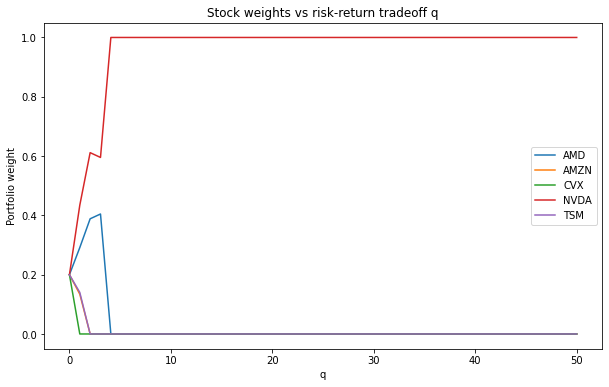

In [152]:
weights_all = np.zeros((len(q_values), n))  # store weights for all q and all stocks

for i, q in enumerate(q_values):
    res = minimize(cost_func, init, args=(sigma, r, q), bounds=bounds, constraints=constraints)
    weights_all[i] = res.x  # store all stock weights at this q

plt.figure(figsize=(10,6))
for j, stock in enumerate(stocks):
    plt.plot(q_values, weights_all[:, j], label=stock)
plt.xlabel("q")
plt.ylabel("Portfolio weight")
plt.title("Stock weights vs risk-return tradeoff q")
plt.legend()
plt.show()

## Results

# Conclusion 